In [1]:
import pandas as pd
import os

# 현재 파이썬 코드의 파일 경로
current_path = os.getcwd()  # 현재 작업 디렉토리를 가져옵니다.

# CSV 파일 경로
file_path = os.path.join(current_path, 'filtered_data.csv')  # User uploaded fioytle to this path

df = pd.read_csv(file_path)
df

,note_id,person_id,age,gender_source_value,BMI,admission_department,division,ward,asa_class,surgeon_id,...,condition_source_value,surgery_room,previous_surgery,emergency_status,op_timing,day_of_the_week,week_of_the_month,month,surgeon_estimated_op_time,surgery_duration
0,101058,29,81,F,25.247087,General Surgery,Admission,NUGW2,2,9885,...,D00002196,203,N,N,TF2,Thursday,4,October,130,66
1,57801,64,60,F,24.376249,Otolaryngology,Admission,102,2,6194,...,D00003798,504,N,N,8A,Friday,2,January,300,130
2,71288,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF4,Monday,4,April,100,85
3,135104,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF2,Monday,3,August,100,83
4,221210,71,94,M,27.963140,Orthopedics,Admission,41,2,29473,...,D00018711,108,N,N,TF4,Monday,5,March,100,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161214,297111,4055249,1,M,23.700428,Pediatric Surgery,Admission,5A,1,100613,...,D00011688,5,N,Y,etc,Tuesday,2,September,200,123
161215,297455,4055328,1,M,20.612160,Pediatric Urology,Day,PDSC,1,6259,...,D00016707,7,N,N,8A,Monday,4,September,130,45
161216,297761,4055407,1,M,12.502703,Pediatric Surgery,Admission,5A,2,105057,...,D00011524,5,N,N,8A,Wednesday,3,September,130,43
161217,297753,4055558,4,F,14.365794,Pediatric Surgery,Admission,5A,2,105057,...,D00004831,5,N,N,TF6,Wednesday,3,September,130,82


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13508\670271828.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surgical_department', y='surgery_duration', data=adult_department_data, palette=custom_palette)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13508\670271828.py:22: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='surgical_department', y='surgery_duration', data=adult_department_data, palette=custom_palette)


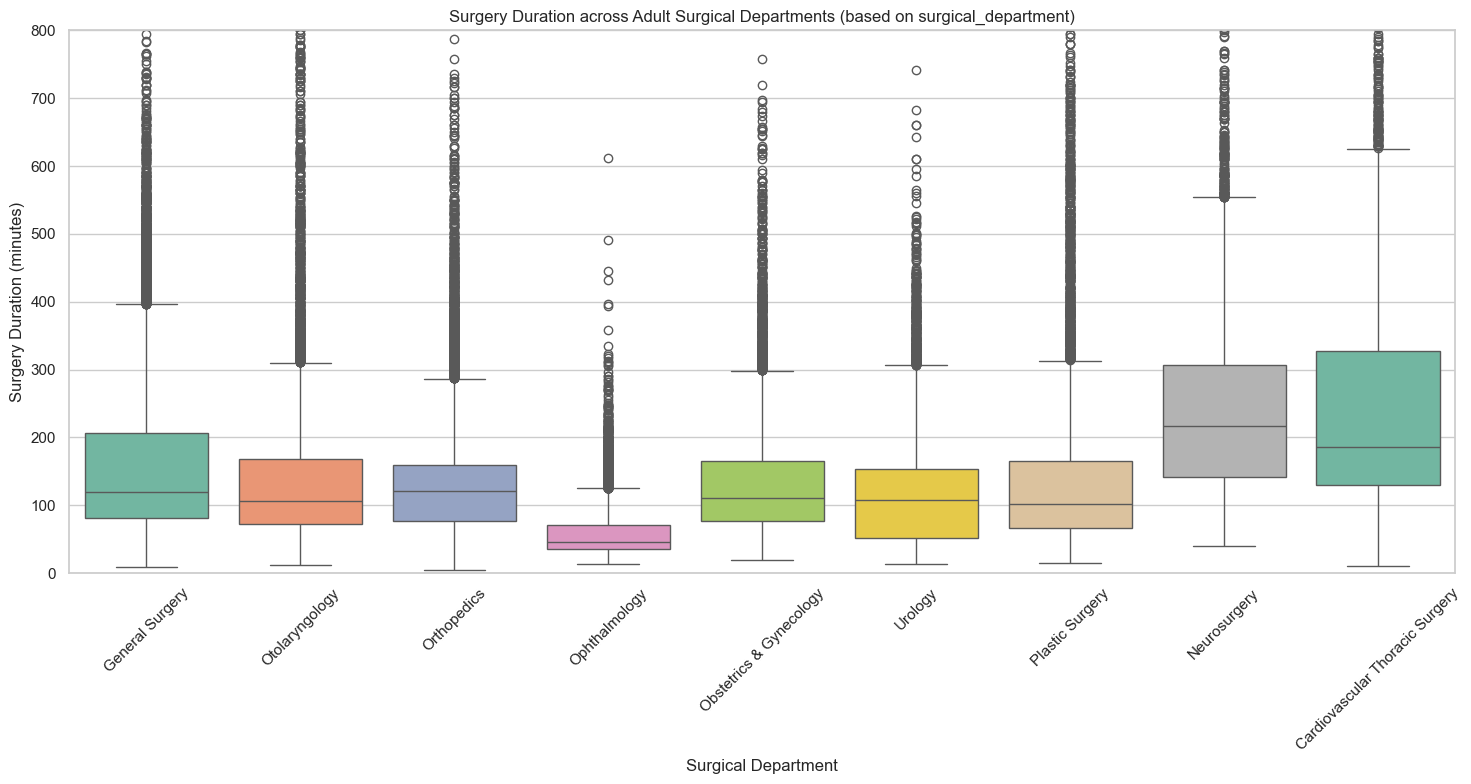

(array(['General Surgery', 'Otolaryngology', 'Orthopedics',
        'Ophthalmology', 'Obstetrics & Gynecology', 'Urology',
        'Plastic Surgery', 'Neurosurgery',
        'Cardiovascular Thoracic Surgery'], dtype=object),
 None)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Categorizing 'surgical_department' into Pediatric and Adult
df['surgical_department_category'] = df['surgical_department'].apply(lambda x: 'Pediatric' if 'Pediatric' in x else 'Adult')

# Separating the dataset for Adult surgical departments based on 'surgical_department'
adult_department_data = df[df['surgical_department_category'] == 'Adult']

# Checking unique adult surgical departments
unique_adult_surgical_departments = adult_department_data['surgical_department'].unique()

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Creating a boxplot for the revised column with custom colors
plt.figure(figsize=(15, 8))
plt.ylim(0, 800)
sns.boxplot(x='surgical_department', y='surgery_duration', data=adult_department_data, palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Surgery Duration across Adult Surgical Departments (based on surgical_department)')
plt.xlabel('Surgical Department')
plt.ylabel('Surgery Duration (minutes)')
plt.tight_layout()

# Displaying the unique adult surgical departments and the plot
unique_adult_surgical_departments, plt.show()

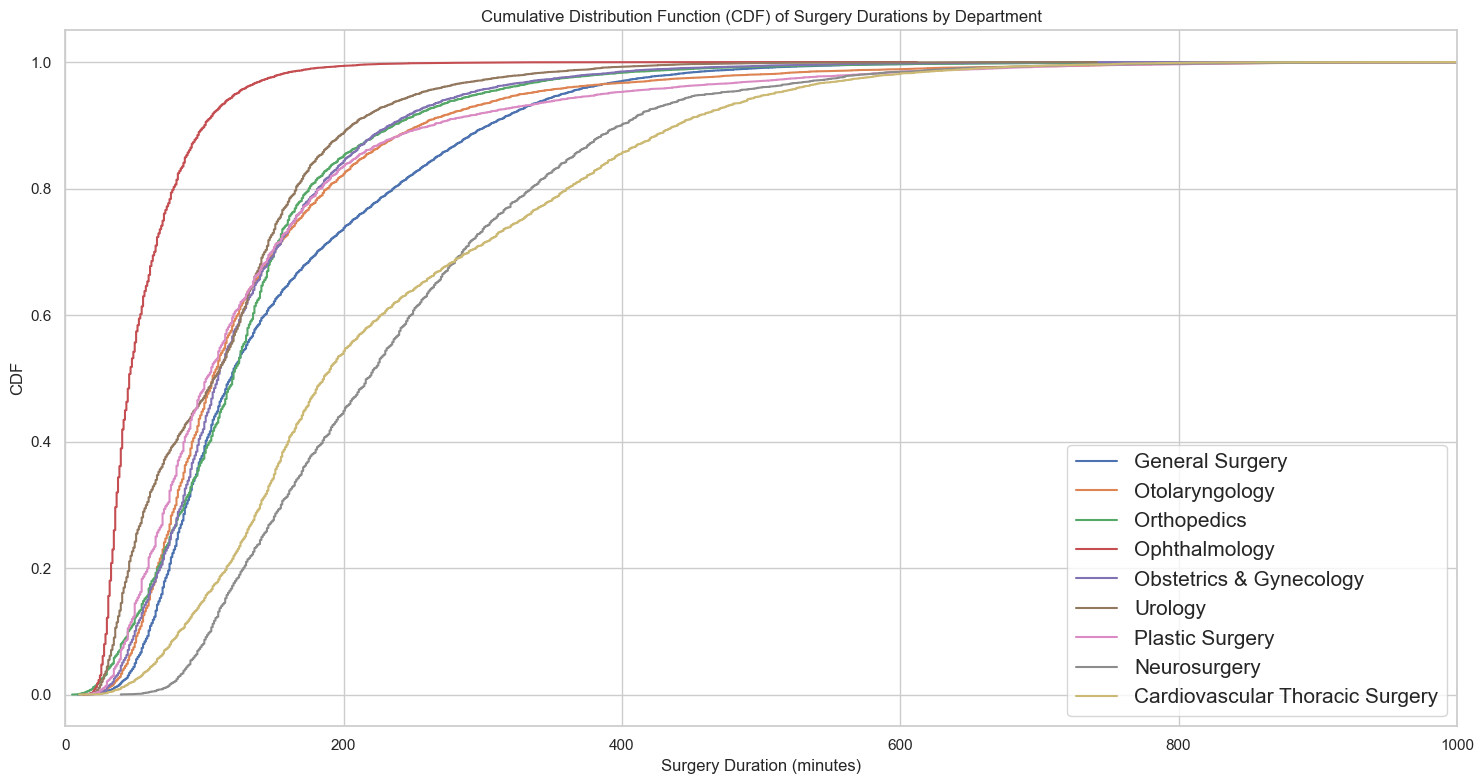

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Preparing data for CDF plots
cdf_data = {}
for department in unique_adult_surgical_departments:
    department_data = adult_department_data[adult_department_data['surgical_department'] == department]['surgery_duration']
    cdf_data[department] = np.sort(department_data)

# Creating CDF plots for each department
plt.figure(figsize=(15, 8))

for department, durations in cdf_data.items():
    # Calculate the CDF
    n = len(durations)
    y = np.arange(1, n+1) / n
    plt.plot(durations, y, label=department)
    
plt.xlim(0, 1000)
plt.title('Cumulative Distribution Function (CDF) of Surgery Durations by Department')
plt.xlabel('Surgery Duration (minutes)')
plt.ylabel('CDF')
plt.legend(loc='best', prop={'size': 15})  # 폰트 크기 조절
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()
